# Image alignment

The purpose of this notebook is to resize and align the ppl, xpl, and false-color TIMA images for use in data collection.


In [2]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import pickle
import imutils
import sys

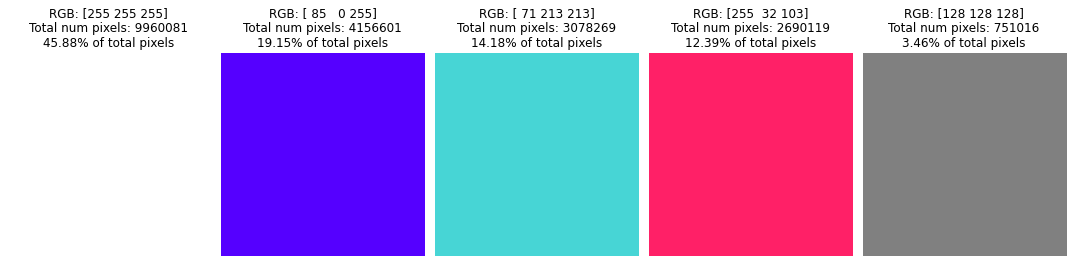

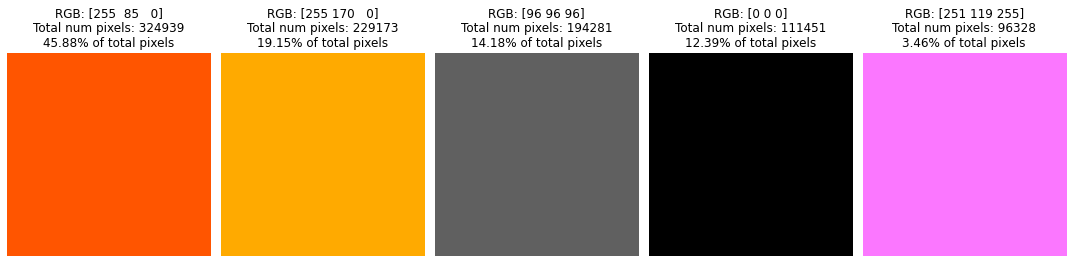

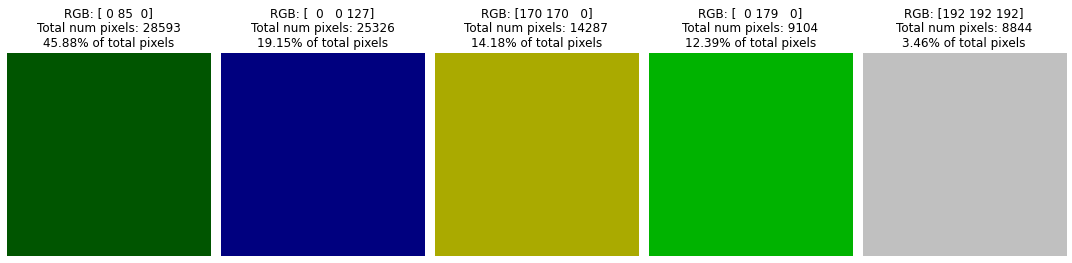

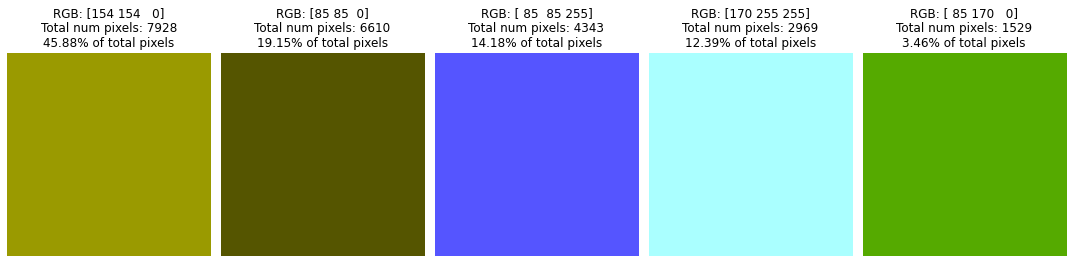

In [4]:
import kcquant as kcq
import numpy as np
from PIL import Image

img = Image.open('Images/test.png').convert('RGB')

kcq.get_colors(np.array(img),color='RGB', top=20)

# Test out manual pixel coordinates

Text(0.5, 1.0, 'XPL Image')

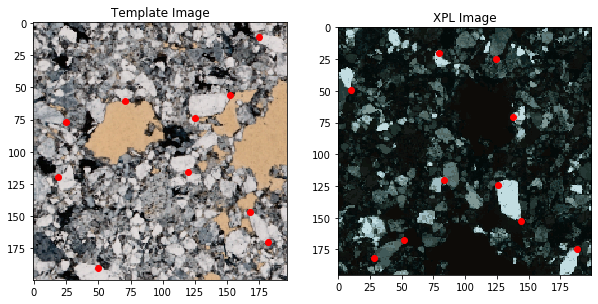

In [49]:
# create two lists of matched coordinate pairs

#xpl
pts1 = np.array([[126, 124], [144, 153], [188, 175], [83, 120], [10,49],
                 [138, 71],[52, 168], [28, 182], [124, 25], [79,20]])

#ppl
pts2 = np.array([[125, 74], [152, 56], [175, 11], [120, 116], [50, 190],
                 [71, 61],[168, 147], [182, 170], [25, 77], [19, 120]])
# load and view sample image
img = cv2.imread('Images/xplimg.png')
template = cv2.imread('Images/template.jpg')


plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(template)
# plot dots
plt.scatter(pts2[:,0], pts2[:,1], color='r')
plt.title('Template Image')

plt.subplot(1,2,2)
plt.imshow(img)
# plot red dot
plt.scatter(pts1[:,0], pts1[:,1],color='r')
plt.title('XPL Image')


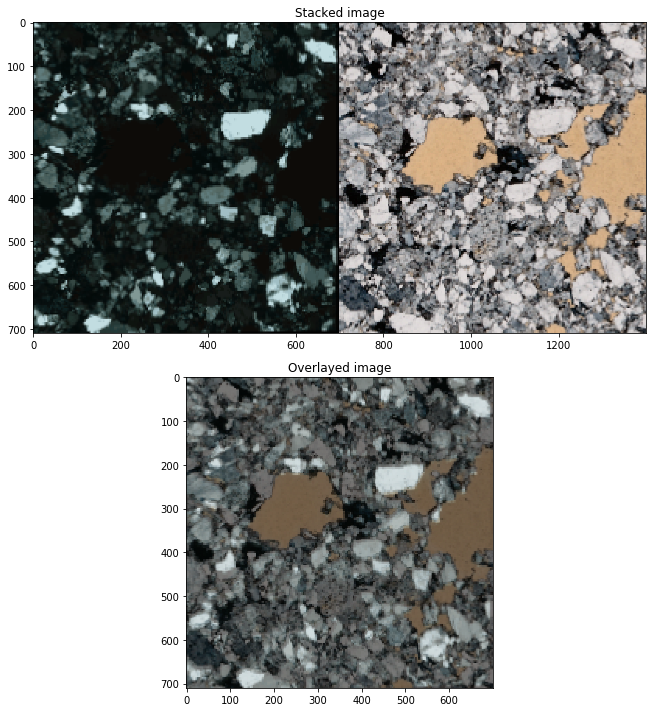

In [29]:
(H, mask) = cv2.findHomography(pts1, pts2, method = cv2.RANSAC)

# use the homography matrix to align the images
(h, w) = template.shape[:2]
aligned = cv2.warpPerspective(img, H, (w,h))

# resize both the aligned and template images so we can easily 
# visualize them on the screen
aligned = imutils.resize(aligned, width=700)
template = imutils.resize(template, width=700)

# side-by-side comparison of the output aligned image and the template
stacked = np.hstack([aligned, template])

# second image alignment visualization will be overlaying the
# aligned image on the template to get an idea of how good
# the image alignment is

overlay = template.copy()
output = aligned.copy()
cv2.addWeighted(overlay, 0.5, output, 0.5, 0, output)

# show the two output inmage alignment visualizations
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.title('Stacked image')
plt.imshow(stacked)
plt.subplot(2,1,2)
plt.title('Overlayed image')
plt.imshow(output)

plt.tight_layout()

# Edge detection

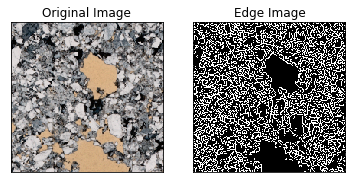

In [80]:
img = cv2.imread('Images/image.jpg')
edges = cv2.Canny(img, 100, 100)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

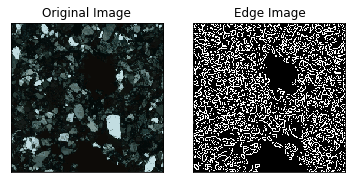

In [81]:
img = cv2.imread('Images/xplimg.png')
edges = cv2.Canny(img, 50, 2)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

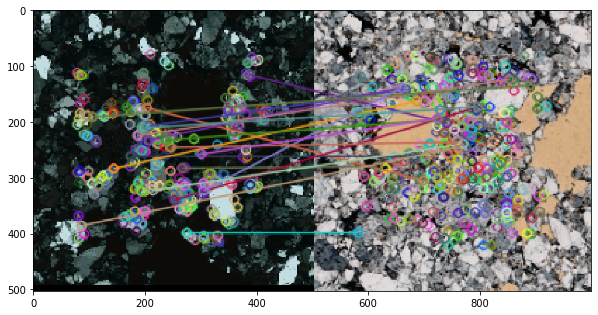

In [83]:
# open images
# transformed ppl image
#img = cv2.imread('Images/image.jpg')

# larger ppl image
#img = cv2.imread('Images/larger_img.jpg')

# transformed xpl image
img = cv2.imread('Images/xplimg.png')
imgGray = cv2.Canny(img, 50, 2)

# original ppl image
template = cv2.imread('Images/template.jpg')
templateGray = cv2.Canny(template, 100, 100)

'''Uncomment when you arent using edges'''
# img = cv2.imread('smileyface.jpeg')
# template = cv2.imread('template.jpeg')

# convert to grayscale
#imageGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
height, width = templateGray.shape

# use ORB to detect keypoints and extract (binary) 
# local invariant features
orb = cv2.ORB_create(500)
kp1, d1 = orb.detectAndCompute(img, None)
kp2, d2 = orb.detectAndCompute(templateGray, None)

# match features
method = cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
matcher = cv2.DescriptorMatcher_create(method)
matches = matcher.match(d1, d2, None)

# sort matches by their distance (smaller distance,
# means more similar features)
matches = sorted(matches, key=lambda x: x.distance)
no_of_matches = len(matches)

# keep only the top matches
keep = int(len(matches) * 0.05)
matches = matches[:keep]

# check to see if we should visualize the matched keypoints
matchedVis = cv2.drawMatches(img, kp1, template, kp2, matches, None)
matchedVis = imutils.resize(matchedVis, width = 1000)

plt.figure(figsize=(10,8))
plt.imshow(matchedVis)

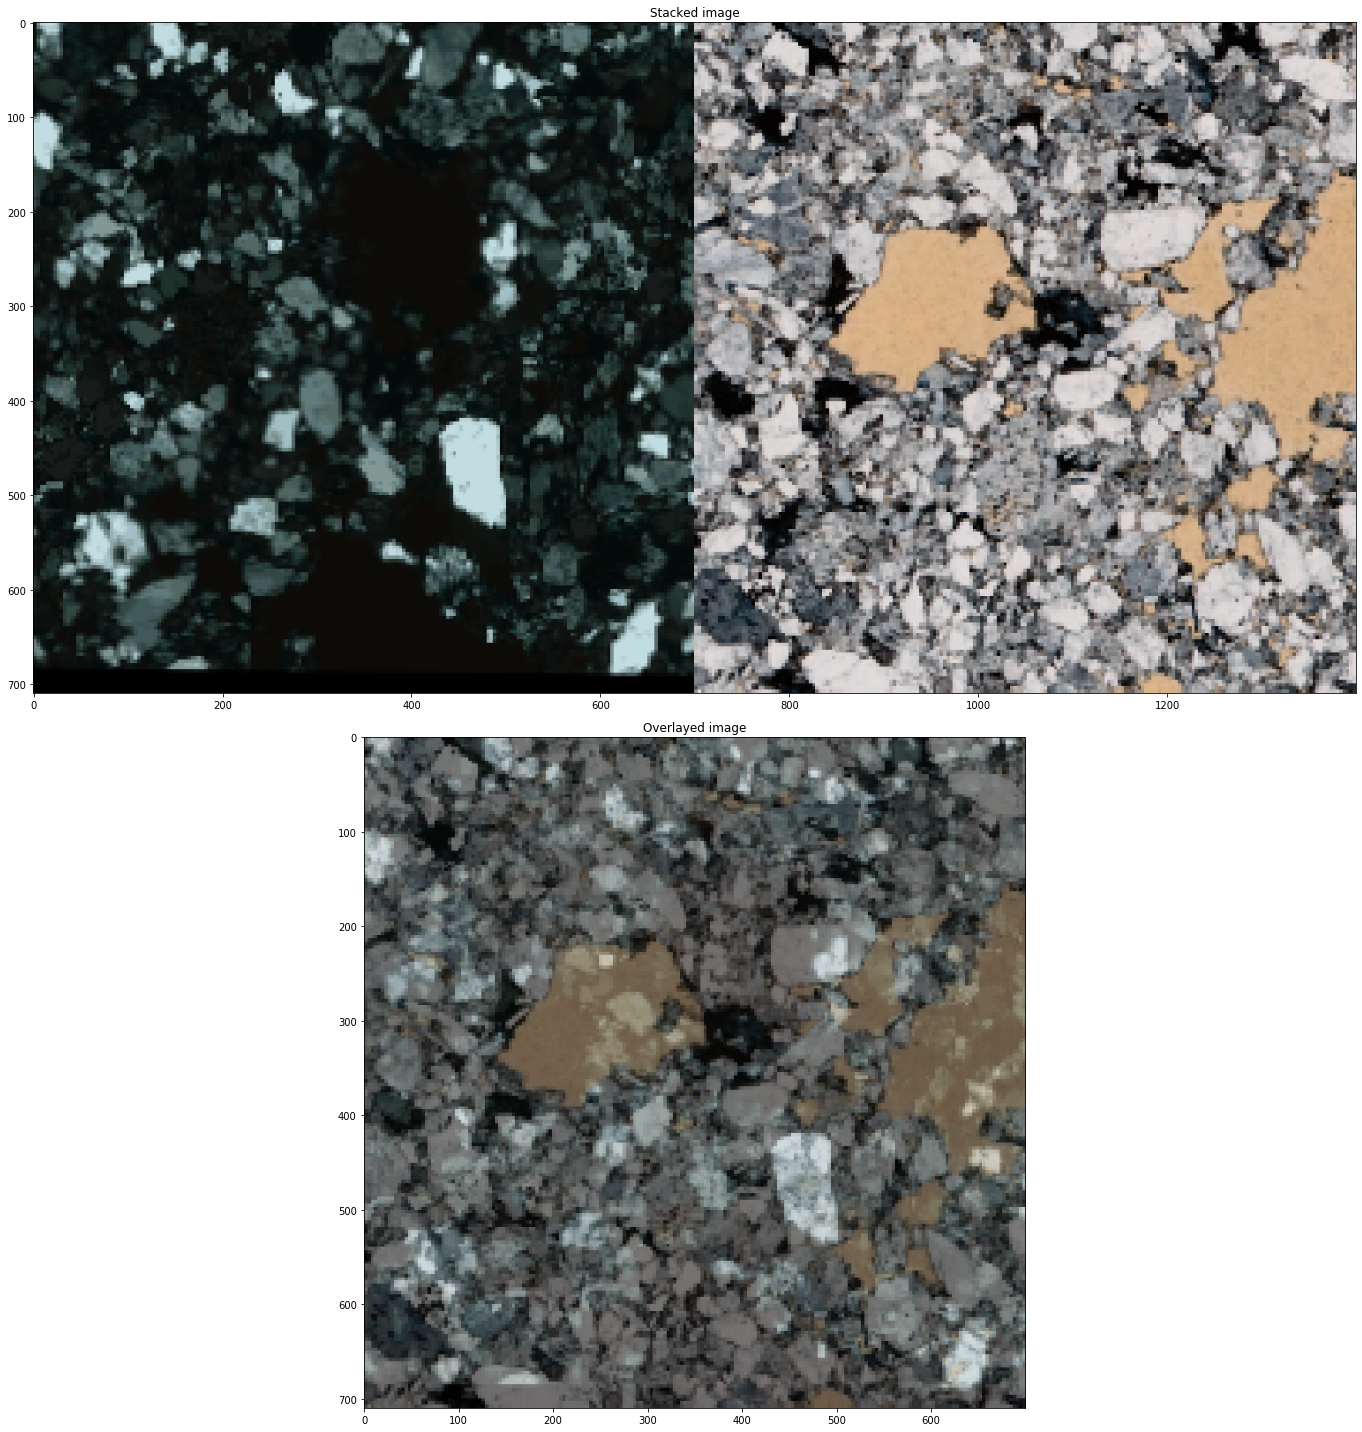

In [84]:
# compute homography matrix between two sets of matched points
(H, mask) = cv2.findHomography(pts1, pts2, method = cv2.RANSAC)

# use the homography matrix to align the images
(h, w) = template.shape[:2]
aligned = cv2.warpPerspective(img, H, (w,h))


# resize both the aligned and template images so we can easily 
# visualize them on the screen
aligned = imutils.resize(aligned, width=700)
template = imutils.resize(template, width=700)

# side-by-side comparison of the output aligned image and the template
stacked = np.hstack([aligned, template])

# second image alignment visualization will be overlaying the
# aligned image on the template to get an idea of how good
# the image alignment is

overlay = template.copy()
output = aligned.copy()
cv2.addWeighted(overlay, 0.5, output, 0.5, 0, output)

# show the two output inmage alignment visualizations
plt.figure(figsize=(20,20))

plt.subplot(2,1,1)
plt.title('Stacked image')
plt.imshow(stacked)

plt.subplot(2,1,2)
plt.title('Overlayed image')
plt.imshow(output)

plt.tight_layout()

# Use manually selected keypoints

Given our organized pairs of keypoint matches, now we are ready to align the image

In [5]:
df = pd.read_pickle('homography_pts.pkl')
df.head(16)
print(df.shape)

(9, 3)


In [6]:
df.head(16)

ppl          xpl        labels
0   [564, 687]   [560, 687]  [1660, 2375]
1  [172, 1513]  [172, 1513]   [611, 5117]
2   [508, 335]   [506, 338]  [1501, 1438]
3    [78, 181]    [80, 181]   [341, 1033]
4  [874, 1276]  [872, 1282]  [2534, 3957]
5    [32, 811]    [34, 815]   [246, 2741]
6   [979, 621]   [979, 626]  [2805, 2185]
7  [198, 1223]  [200, 1228]   [699, 3838]
8  [652, 1686]  [647, 1694]  [1938, 5069]

In [7]:
def align_images(df, ppl_img, xpl_img, labels_img, threshold=10, confidence=0.99):

    # get pts from df
    ppl_pts = np.array(df['ppl'].tolist())
    xpl_pts = np.array(df['xpl'].tolist())
    labels_pts = np.array(df['labels'].tolist())

    # compute homography matrix between two sets of matched points
    (xpl_H, xpl_mask) = cv2.findHomography(ppl_pts, xpl_pts, cv2.RANSAC, ransacReprojThreshold=threshold, confidence=confidence)
    (labels_H, labels_mask) = cv2.findHomography(ppl_pts, labels_pts, cv2.RANSAC, ransacReprojThreshold=threshold, confidence=confidence)
    
    # use the homography matrix to align the images to the ppl img
    (xpl_h, xpl_w) = ppl_img.shape[:2]
    xpl_aligned = cv2.warpPerspective(xpl_img, xpl_H, (xpl_w,xpl_h))
    
    (labels_h, labels_w) = ppl_img.shape[:2]
    labels_aligned = cv2.warpPerspective(labels_img, labels_H, (labels_w,labels_h))


    # resize both the aligned and template images so we can easily 
    # visualize them on the screen
    ppl_aligned = imutils.resize(ppl_img, width=700)
    xpl_aligned = imutils.resize(xpl_aligned, width=700)
    labels_aligned = imutils.resize(labels_aligned, width=700)
    
    ppl = imutils.resize(ppl_img, width=700)
    xpl = imutils.resize(xpl_img, width=700)
    labels = imutils.resize(labels_img, width=700)

    # side-by-side comparison of the output aligned image and the template
    stacked = np.hstack([ppl_aligned, xpl_aligned, labels_aligned])

    # second image alignment visualization will be overlaying the
    # aligned image on the template to get an idea of how good
    # the image alignment is

    template = ppl_aligned.copy()
    xpl_overlay = xpl_aligned.copy()
    labels_overlay = labels_aligned.copy()
    
    cv2.addWeighted(template, 0.5, xpl_overlay, 0.5, 0, xpl_overlay)
    cv2.addWeighted(template, 0.5, labels_overlay, 0.5, 0, labels_overlay)
    
    cv2.addWeighted(template, 0.5, xpl, 0.5, 0, xpl)
    cv2.addWeighted(template, 0.5, labels, 0.5, 0, labels)
    
    # stack overlay imgs next to each other
    overlays_stacked = np.hstack([xpl, labels])
    aligned_overlays_stacked = np.hstack([xpl_overlay, labels_overlay])

    # show the two output inmage alignment visualizations
    plt.figure(figsize=(30,20))

    plt.subplot(3,1,1)
    plt.title('Side-by-side images')
    plt.imshow(stacked)
    
    plt.subplot(3,1,2)
    plt.title('Un-aligned overlayed images')
    plt.imshow(overlays_stacked)

    plt.subplot(3,1,3)
    plt.title('Aligned overlayed images')
    plt.imshow(aligned_overlays_stacked)

    plt.tight_layout()
    
    return overlays_stacked

In [8]:
ppl_img = cv2.imread('Images/ppltest.jpg')
xpl_img = cv2.imread('Images/xpltest2.png')
labels_img = cv2.imread('Images/EDF17-1.png')

output = align_images(df, ppl_img, xpl_img, labels_img)

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-39p1qqfs/opencv/modules/core/src/arithm.cpp:669: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [113]:
xpl_img.shape

(1553, 966, 3)

## References

https://www.geeksforgeeks.org/image-registration-using-opencv-python/

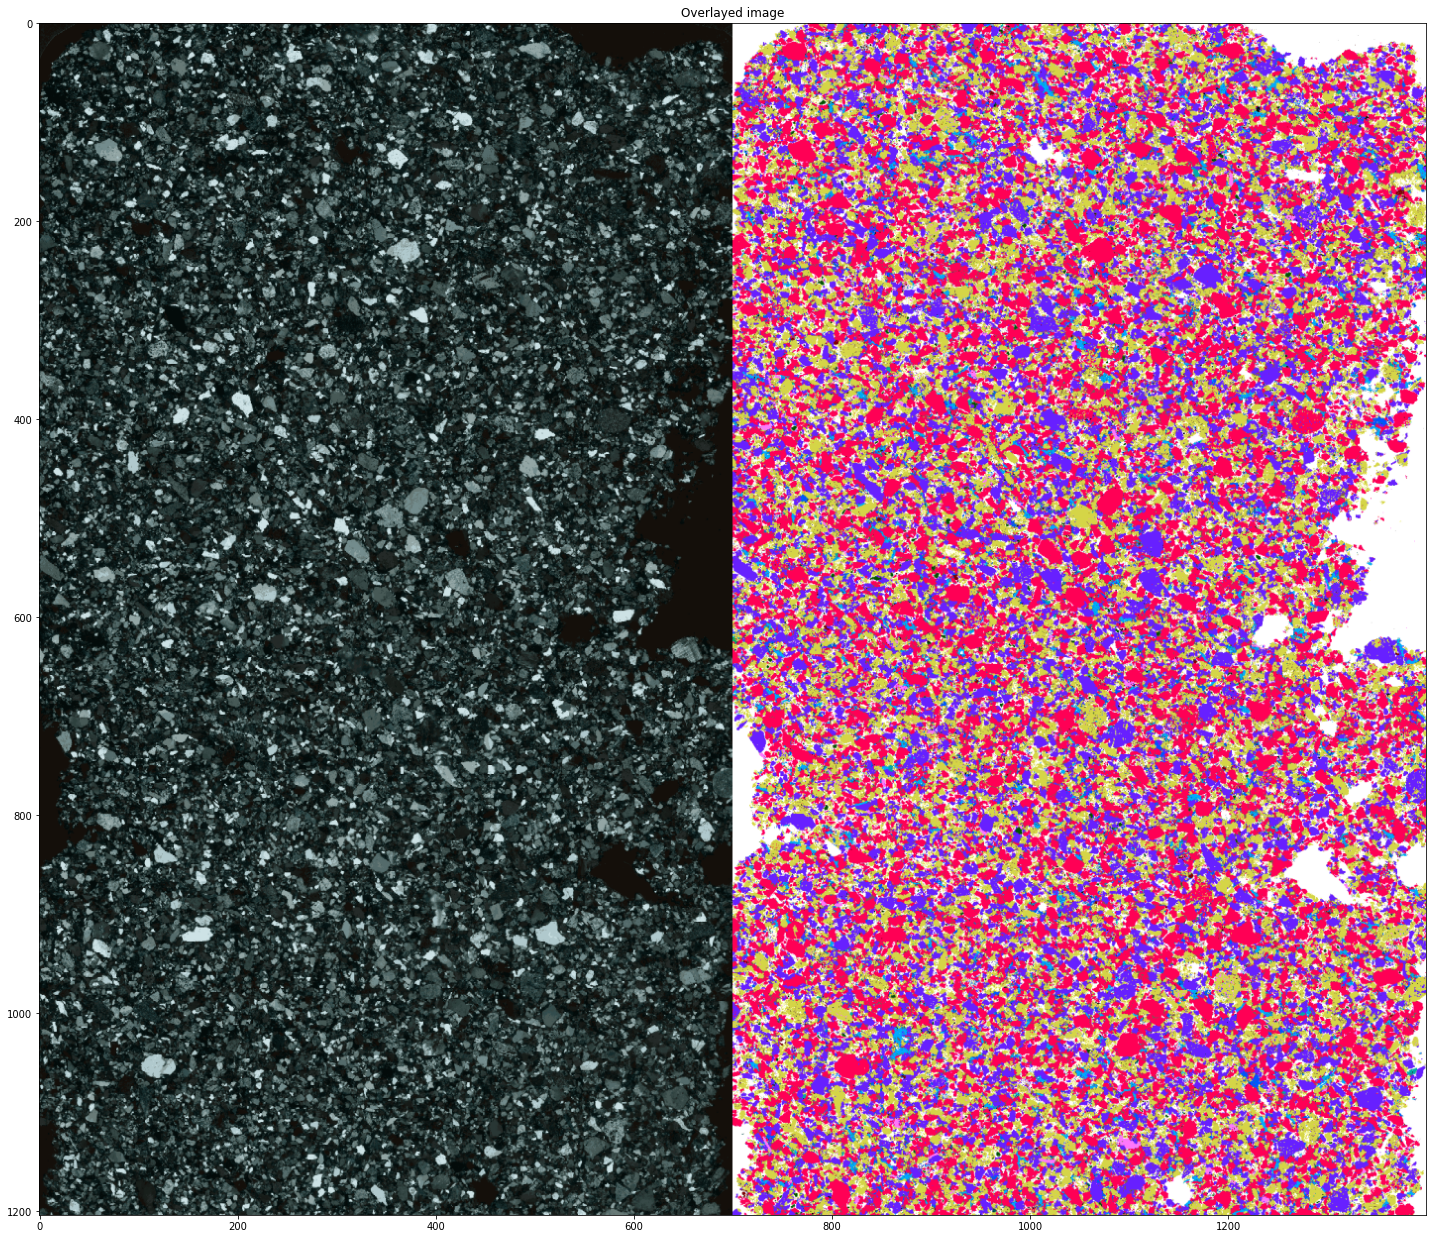

In [108]:
plt.figure(figsize=(20,20))

plt.title('Overlayed image')
plt.imshow(output)

plt.tight_layout()